##Libraries and Necessary Things

In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil

import pandas as pd
import numpy as np
import os
import copy, cv2, glob, shutil
from google.colab import files
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [3]:
#Mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Unpack Archive
from shutil import unpack_archive

zipdata_path = '/content/drive/MyDrive/Colab Notebooks/Facial Expression/facial_expression_recognition.zip'
unpack_archive(zipdata_path,'')

In [5]:
# Creating Path for data directory

train_path = '/content/images/train'
validation_path = '/content/images/validation'

In [9]:
# Variable

category = len(os.listdir(train_path)) # jumlah kategori
batch_size = 256
epochs = 20

In [7]:
print(os.listdir(train_path))

['angry', 'fear', 'neutral', 'happy', 'surprise', 'sad', 'disgust']


In [10]:
# Creating model

model = Sequential()

# First layer
model.add(Conv2D(64, (5,5), activation = 'relu', input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size = (5,5), strides = (2,2)))

# Second layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

# Third layer
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

# Fourth Layer

model.add(Flatten())

# Output layer
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(category, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        1664      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_2 (Averag  (None, 7, 7, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 256)        

In [11]:
# Setup data batch processing

# Add data augmentation
#train_data = ImageDataGenerator(rescale = 1./255,
                                #rotation_range = 20,
                                #zoom_range = 0.2,
                                #fill_mode='nearest'
                                #)

train_data = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
)

val_data = ImageDataGenerator(rescale = 1./255)

# Flow training data using 128 batches
train_generator = train_data.flow_from_directory(
    directory = train_path,
    target_size = (48,48),
    class_mode='categorical',
    color_mode='grayscale', 
    batch_size = batch_size
)

# Flow validation data
val_generator = val_data.flow_from_directory(
    directory = validation_path,
    target_size = (48,48), 
    class_mode='categorical',
    color_mode='grayscale',
    batch_size = int(batch_size/4)
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [14]:
# Compile model
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics = ["accuracy"])

In [15]:
# fit model
history = model.fit(train_generator,
          validation_data = val_generator,
          epochs = epochs,
          steps_per_epoch = int(28821/batch_size),
          validation_steps = int(7066/batch_size),
          verbose = 1)

Epoch 1/20
112/112 [==============================] - 28s 217ms/step - loss: 1.8196 - accuracy: 0.2468 - val_loss: 1.8018 - val_accuracy: 0.2610
Epoch 2/20
112/112 [==============================] - 23s 206ms/step - loss: 1.8002 - accuracy: 0.2494 - val_loss: 1.7847 - val_accuracy: 0.2639
Epoch 3/20
112/112 [==============================] - 24s 214ms/step - loss: 1.7405 - accuracy: 0.2820 - val_loss: 1.6726 - val_accuracy: 0.3183
Epoch 4/20
112/112 [==============================] - 19s 169ms/step - loss: 1.6739 - accuracy: 0.3229 - val_loss: 1.6357 - val_accuracy: 0.3582
Epoch 5/20
112/112 [==============================] - 19s 168ms/step - loss: 1.6001 - accuracy: 0.3638 - val_loss: 1.5049 - val_accuracy: 0.4097
Epoch 6/20
112/112 [==============================] - 19s 167ms/step - loss: 1.5456 - accuracy: 0.3936 - val_loss: 1.4080 - val_accuracy: 0.4601
Epoch 7/20
112/112 [==============================] - 20s 174ms/step - loss: 1.4781 - accuracy: 0.4244 - val_loss: 1.4614 - val_ac

In [16]:
# Evaluate model

import math

eval = model.evaluate(val_generator)
print("Loss: " + str(eval[0]))
print("Accuracy: " + str(round(eval[1]*100, 2)) + " %")

111/111 [==============================] - 2s 19ms/step - loss: 1.1318 - accuracy: 0.5698
Loss: 1.131800889968872
Accuracy: 56.98 %


Text(0.5, 0, 'Epoch')

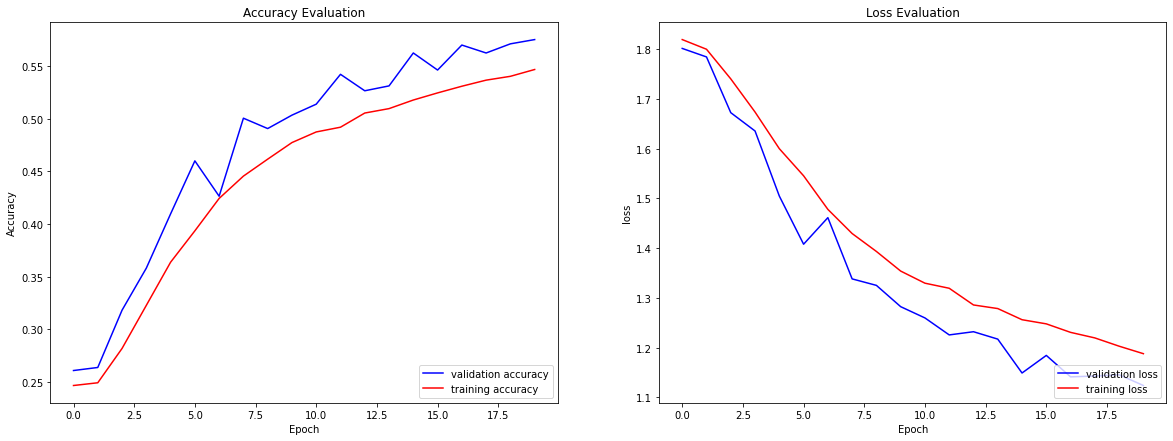

In [17]:
# Visualize training and validation data

plt.figure(figsize=[20,7])

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(history.history["val_accuracy"], "b", label = "validation accuracy")
plt.plot(history.history["accuracy"], "r", label = "training accuracy")
plt.title("Accuracy Evaluation")
plt.legend(loc="lower right")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2) # index 2
plt.plot(history.history["val_loss"], "b", label = "validation loss")
plt.plot(history.history["loss"], "r", label = "training loss")
plt.title("Loss Evaluation")
plt.legend(loc="lower right")
plt.ylabel('loss')
plt.xlabel('Epoch')

##Code Implementation

In [18]:
def emotion_analysis(emotions, x): # emotions >> prediction, x >> image converted to array
    objects = os.listdir(train_path)
    y_pos = np.arange(len(objects))
    
    plt.figure(figsize=[20,5])

    lab = objects[np.argmax(emotions)]

    plt.subplot(1, 2, 2) # row 1, col 2 index 2
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage (%)')
    plt.title('emotion')
    
    plt.subplot(1, 2, 1) # index 1
    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);
    plt.gray()
    plt.xlabel(lab + ' ' + str(round(max(emotions),2)) + '%')
    plt.imshow(x)


Saving smiling-face-mark-thomasscience-photo-library.jpg to smiling-face-mark-thomasscience-photo-library (21).jpg
Saving test image.jfif to test image (7).jfif
[[2.0747518e-03 1.7012415e-05 3.9111712e-04 9.9295652e-01 1.3788689e-03
  6.8518661e-05 3.1132421e-03]]
[[0.04229538 0.00270885 0.24765606 0.17998236 0.14160854 0.23462275
  0.15112613]]


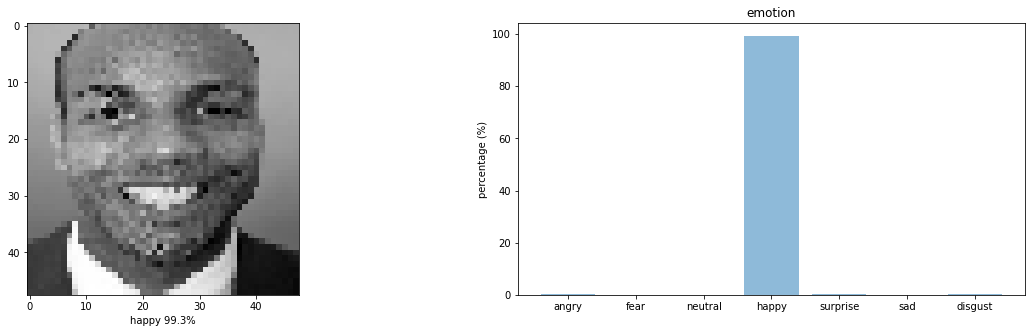

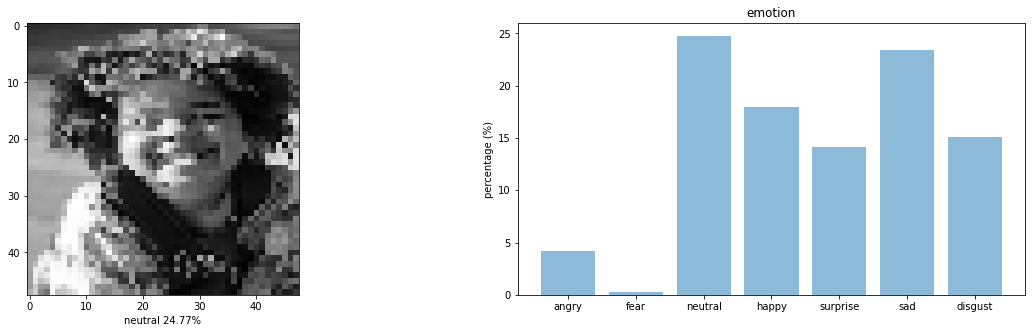

In [19]:
### Active code if you want predict use image ###
### Make prediction for custom image out of test set ###

from google.colab import files

image_files = files.upload()		

for i in image_files.keys() :

  # Images path
  path = '/content/' + i
  img = image.load_img(path, color_mode = 'grayscale', target_size=(48, 48))

  # Input processing
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  x /= 255

  # Image prediction
  custom = model.predict(x)
  percent = custom[0] * 100
  emotion_analysis(percent, x)
  print(custom)